# Logistic regression

- Newton's model

In [233]:
import numpy as np

raw_X = np.loadtxt(path('data/logistic_x.txt')) # m x n
raw_y = np.loadtxt(path('data/logistic_y.txt')) # 1 x m

y = np.array([1 if v == 1 else 0 for v in raw_y])

x_0 = np.ones(X.shape[0]).reshape(-1, 1) # (m,) => (m, 1)
X = np.concatenate((x_0, raw_X), axis=1) # m, n+1

theta = np.zeros(X.shape[1])

print(X[:5])
print(y)
print(theta)

[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0. 0. 0.]


## Newton's method

Update rule: $\theta := \theta - H^{-1} \nabla_{\theta} l(\theta)$

Partial derivative vector and Hessian:
$$
\begin{aligned}
\nabla_{\theta} \ell (\theta)_{j} &= \sum_{i = 1}^m (y^{(i)} - h_{\theta}(x^{(i)}))x_j^{(i)} \\
\\
H_{kj} &= \frac{\partial^2 \ell(\theta)}{\partial \theta_k \partial \theta_j} \\
&= \sum_{i = 1}^m x_j^{(i)} x_k^{(i)} g(\theta^T x^{(i)}) (1 - g(\theta^T x^{(i)}))
\end{aligned}
$$

In [276]:
def sigmoid(z):
    '''vectorized sigmoid'''
    return 1 / (1 + np.exp(-z))

def hypothesis(theta, X):
    '''vectorized hypothesis, X = design matrix'''
    return sigmoid(X @ theta) # result is length m vector

def partials(theta, X, y):
    '''vectorized partial derivative'''
    h = hypothesis(theta, X)
    residuals = (y - h)
    # jth index of this vector = sum over all training: res * jth feature
    return residuals @ X # result is length n vector

def hessian(theta, X, y):
    prod = hypothesis(theta, X) * (1 - hypothesis(theta, X)) # m-vector
    D = np.diag(prod) # construct diagonal matrix of sigmoid products
    return -X.T @ D @ X # error: was missing the - sign!! spent so long on this

# this cost only works for for y = {-1, 1}
# def cost(theta, X, y):
#     m = X.shape[0]
#     return np.sum(np.log(1 + np.exp( (-y - (X @ theta) ))) / m

def likelihood(theta, X, y):
    class_1 = y @ np.log(hypothesis(theta, X))
    class_0 = (1 - y) @ np.log(1 - hypothesis(theta, X))
    
    return np.sum(class_1 + class_0)
    

In [277]:
print(partials(theta, X, y))
print(hessian(theta, X, y))
print(hypothesis(theta, X))

[-1.43906518e-06  4.43361739e-06  1.82322919e-05]
[[  -9.90971011  -38.43217484    2.56819119]
 [ -38.43217484 -182.17210976   17.25051958]
 [   2.56819119   17.25051958  -18.31163814]]
[0.04073133 0.12131773 0.01656355 0.04484228 0.03035875 0.02828376
 0.02905206 0.0192041  0.0082712  0.01096219 0.01366149 0.01057484
 0.00603426 0.01592078 0.02392373 0.02913591 0.10871452 0.11097018
 0.05064044 0.06006161 0.06707675 0.14272118 0.10060648 0.06899829
 0.10186163 0.30013108 0.28640283 0.41153642 0.29287794 0.1408947
 0.06949091 0.09748463 0.08180533 0.04364649 0.02554674 0.75710239
 0.90994506 0.92371242 0.15790701 0.03555166 0.16396542 0.27823057
 0.32164569 0.36227619 0.5160356  0.45973086 0.35379108 0.25140507
 0.91996536 0.33586706 0.93876097 0.95140595 0.89844538 0.90410616
 0.8252517  0.82579024 0.84156734 0.80967997 0.91269433 0.84308631
 0.9095753  0.94732626 0.89031974 0.98679534 0.99405301 0.99324701
 0.98469795 0.9953851  0.87365739 0.82566212 0.92383608 0.87762158
 0.89000896

In [278]:
def newton(theta, X, y, threshold = 0.001, max_iter = 15):

    history = []
    delta = np.Inf
    
    while delta >= threshold and len(history) <= max_iter:
        args = (theta, X, y)
        theta -= np.linalg.pinv(hessian(*args)) @ partials(*args)
        like = likelihood(*args)
        delta = like - history[-1] if len(history) >= 1 else np.Inf
        history.append(like)

    return theta

In [279]:
theta = np.zeros(X.shape[1])
theta = newton(theta, X, y)
print(theta)

[-2.62050954  0.76037096  1.17194549]


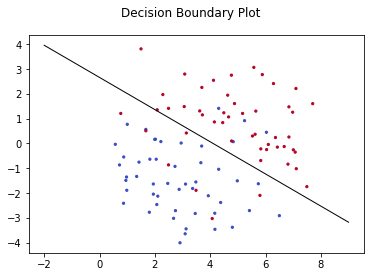

In [305]:
import matplotlib.pyplot as plt

line_x1 = np.arange(-2, 10, 1)
line_x2 = [(0.5 - theta[0] - (theta[1] * i)) / theta[2] for i in line_x1]

fig, ax = plt.subplots()
ax.scatter(X[:,1], X[:,2], s=5, c=y, cmap="coolwarm")
ax.plot(line_x1, line_x2, linewidth=1, c='black')
fig.suptitle('Decision Boundary Plot')
plt.show()